# Solution of assignment
This is the coded solution.

### Part one: only Coulomb scatterers 
The scattering angle is following a uniform distrinution, centered at zero and of spread -$\theta_\text{max}$ to +$\theta_\text{max}$.
How the data got generated:

   Track i =    0	Final angle = 1.2	Defletion = -0.098
   Track i =  100	Final angle = -3.2	Defletion = -0.022
   Track i =  200	Final angle = -3.5	Defletion = -0.282
   Track i =  300	Final angle = -3.5	Defletion = -0.051
   Track i =  400	Final angle = -0.5	Defletion = 0.165
   Track i =  500	Final angle = 2.8	Defletion = -0.024
   Track i =  600	Final angle = 1.1	Defletion = -0.041
   Track i =  700	Final angle = -2.6	Defletion = 0.051
   Track i =  800	Final angle = 0.0	Defletion = 0.072
   Track i =  900	Final angle = -2.1	Defletion = 0.183


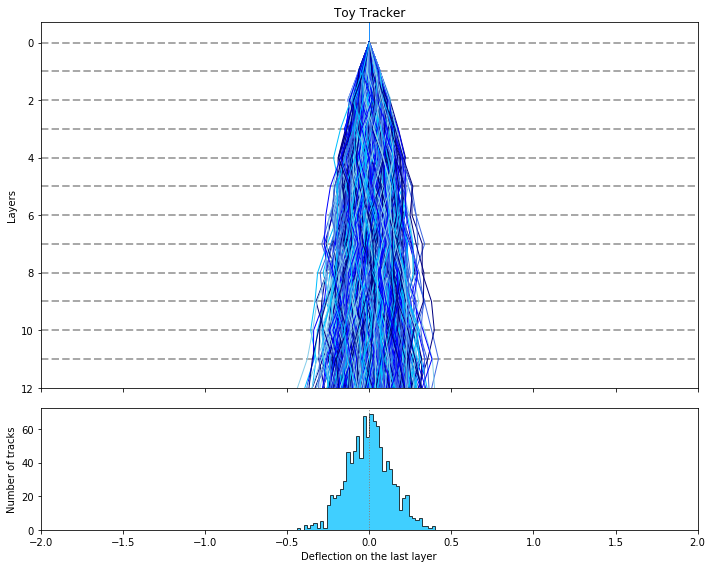

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import gridspec
%reload_ext autoreload
import toyTracker as tk

#==================================================================
# GENERATING THE DATA 
finalDevs = [] 

#==================================================================
# THE UKNOWN PARAMETER:
# Parameter theta_max for the uniform deflected angle on each layer:
theta_max = 3.8
N_tracks  = 1000
#==================================================================
# Config of toy tracker:
minx      = -2.
maxx      = +2.
N_layers  =  12
#==================================================================
# Plotting tools
colors    = ['navy', 'blue', 'royalblue', 'deepskyblue', 'skyblue']
histoConf = dict(histtype='stepfilled', color='deepskyblue', alpha=0.75 , ec="k")
fig, ax   = tk.buildDetector(N_layers, minx, maxx)
nBins     = 200
#==================================================================

# Loop over tracks:
for t in range(N_tracks):
    
    trackXvals = []   # storing the current track X coordinates
    trackYvals = []   # storing the current track Y corrdinates
    thetaIvals = []   # storing the incident angle
    
    # source of particle hits first layer at detector origin with incident angle 0
    x0      = 0
    y0      = 0
    theta0  = 0

    trackXvals.append(x0)
    trackYvals.append(y0)
    thetaIvals.append(theta0)
    
    for l in range(N_layers):

        # Get track coordinate at current layer l
        x_layer = trackXvals[-1]
        y_layer = trackYvals[-1]
        i_theta = thetaIvals[-1]

        # Compute scattering angle to get the deflection at layer 'l + 1' 
        new_angle = 2 * theta_max * random.uniform(0 , 1) - theta_max
        
        # Compute the horizontal deviation (deltaX) on next layer: 
        deviation = tk.getDeflectionWithAngle(new_angle)

        # Store coordinates on next layer
        y_next = y_layer + 1
        x_next = x_layer + deviation
        trackYvals.append( y_next )
        trackXvals.append( x_next )
        thetaIvals.append( new_angle )

        # If on the last layer, store the final deviation (for histogramming later)
        if l == N_layers - 1:
            finalDevs.append( x_next )
        
    #----------------------------------------------
    # Done with track, let's plot it!
    #----------------------------------------------
    ax[0].plot( trackXvals, trackYvals, color=colors[t%len(colors)])

    # Print info:
    if(t%100==0):
        print("   Track i = % 4d\tFinal angle = %.1f\tDefletion = %.3f" %(t, new_angle, x_next))

# Plot distribution on deflection plot

n, binArray, patches = ax[1].hist(finalDevs, nBins, range=[minx, maxx],  **histoConf)

fig.tight_layout()
fig.canvas.draw()



Let's save the data in a text file.

In [14]:
for i in range(len(finalDevs)):
    print("track%05d\t%.5f"%(i, finalDevs[i]))

track00000	-0.08724
track00001	-0.00275
track00002	0.15108
track00003	-0.01390
track00004	-0.13936
track00005	0.13410
track00006	0.05856
track00007	-0.09115
track00008	0.07256
track00009	-0.16219
track00010	0.20967
track00011	0.26925
track00012	0.07677
track00013	0.01699
track00014	0.07034
track00015	-0.06611
track00016	-0.17911
track00017	-0.03274
track00018	-0.01783
track00019	0.08750
track00020	0.03054
track00021	-0.13102
track00022	0.03677
track00023	0.18649
track00024	0.17380
track00025	0.14358
track00026	-0.06449
track00027	0.09374
track00028	0.23493
track00029	-0.19001
track00030	-0.08752
track00031	-0.05092
track00032	0.06986
track00033	-0.00191
track00034	0.08900
track00035	-0.12261
track00036	0.09481
track00037	-0.05122
track00038	0.10982
track00039	-0.06106
track00040	-0.10046
track00041	-0.10068
track00042	0.00154
track00043	-0.06520
track00044	-0.02277
track00045	0.14498
track00046	0.09659
track00047	-0.14161
track00048	-0.00940
track00049	-0.01452
track00050	0.08865
track

Let's try several values of $\theta_\text{max}$ to reproduce the distribution of the lower pad.